# question 4



# Import Libraries

In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import r2_score

import tensorflow as tf
from tensorflow import keras
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Dense

import warnings
warnings.filterwarnings("ignore")

# Data Preprocessing

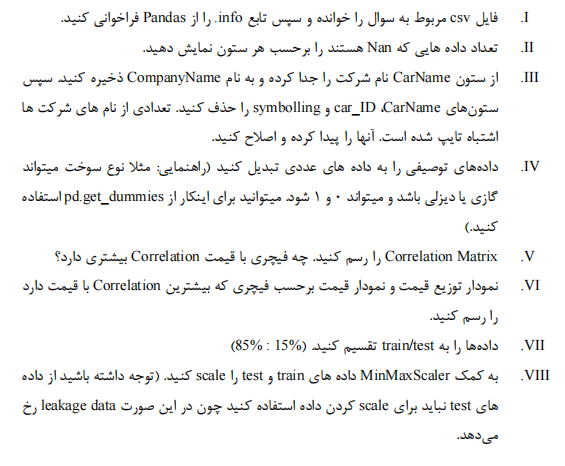

## 1. Read .`csv` file and then call the `.info` method from Pandas.

In [256]:
# Load the dataset from the specified file path
df = pd.read_csv('/content/CarPrice_Assignment.csv')

# Display the first few rows of the DataFrame
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [257]:
# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## 2. Display the number of data that are NaN for each column

In [258]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

## 3.

a.   Separate the company name from the CarName column<br/>
b.   Delete the CarName, car_ID and symbolling columns<br/>
c.   Find misspelled words and replace them






In [259]:
# Extract the "CarName" column
CarName = df["CarName"]

# Count the occurrences of each unique car name
CarName.value_counts()

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

In [260]:
# Initialize an empty list to store company names
CompanyName = []

# Loop through each car name in the 'CarName' column
for car_name in df['CarName']:
    word = car_name.split()[0]  # Split the car name into a list of words using a space as the delimiter and take the first word
    CompanyName.append(word)

# Convert the list to a DataFrame
CompanyName = pd.DataFrame(CompanyName)

# Insert the 'CompanyName' column at index 2
df.insert(2, "CompanyName", CompanyName[0])

# SHow the unique set of company names from the 'CompanyName' column
set(df['CompanyName'])

{'Nissan',
 'alfa-romero',
 'audi',
 'bmw',
 'buick',
 'chevrolet',
 'dodge',
 'honda',
 'isuzu',
 'jaguar',
 'maxda',
 'mazda',
 'mercury',
 'mitsubishi',
 'nissan',
 'peugeot',
 'plymouth',
 'porcshce',
 'porsche',
 'renault',
 'saab',
 'subaru',
 'toyota',
 'toyouta',
 'vokswagen',
 'volkswagen',
 'volvo',
 'vw'}

In [261]:
# Drop the specified columns from the DataFrame
df = df.drop(['car_ID', 'symboling', 'CarName'], axis=1)

In [262]:
# Convert all company names to lowercase for consistency
df['CompanyName'] = df['CompanyName'].str.lower()

# Replace misspelled company names
df['CompanyName'].replace('maxda','mazda',inplace=True)    # Replace "maxda" with "mazda"
df['CompanyName'].replace('porcshce','porsche',inplace=True)   # Replace "porcshce" with "porsche"
df['CompanyName'].replace('vw','volkswagen',inplace=True)      # Replace "vw" with "volkswagen"
df['CompanyName'].replace('vokswagen','volkswagen',inplace=True)     # Replace "vokswagen" with "volkswagen"
df['CompanyName'].replace('toyouta','toyota',inplace=True)          # Replace "toyouta" with "toyota"


In [263]:
df

,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


## 4. Convert descriptive data to numerical data

In [264]:
# List of specified categorical columns
dummy = ['doornumber', 'cylindernumber', 'CompanyName', 'fuelsystem', 'fueltype',
         'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype']

In [265]:
# Convert categorical columns to numerical using one-hot encoding
df2 = pd.get_dummies(df, columns=dummy, drop_first=True)

# Display the first few rows of the modified DataFrame
df2.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,1,0,0,0,0,0,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,1,0,0,0,0,0,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,1,0,0,0,0,0,1,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,1,0,0,0,0,1,0,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,1,0,0,0


## 5. Correlation Matrix

In [266]:
# Calculate the correlation between columns and 'price', then sort them in descending order
correlation_matrix = df2.corr()['price'].sort_values(ascending=False)
correlation_matrix

price                  1.000000
enginesize             0.874145
curbweight             0.835305
horsepower             0.808139
carwidth               0.759325
                         ...   
fuelsystem_2bbl       -0.501374
drivewheel_fwd        -0.601950
citympg               -0.685751
highwaympg            -0.697599
cylindernumber_four   -0.697762
Name: price, Length: 64, dtype: float64

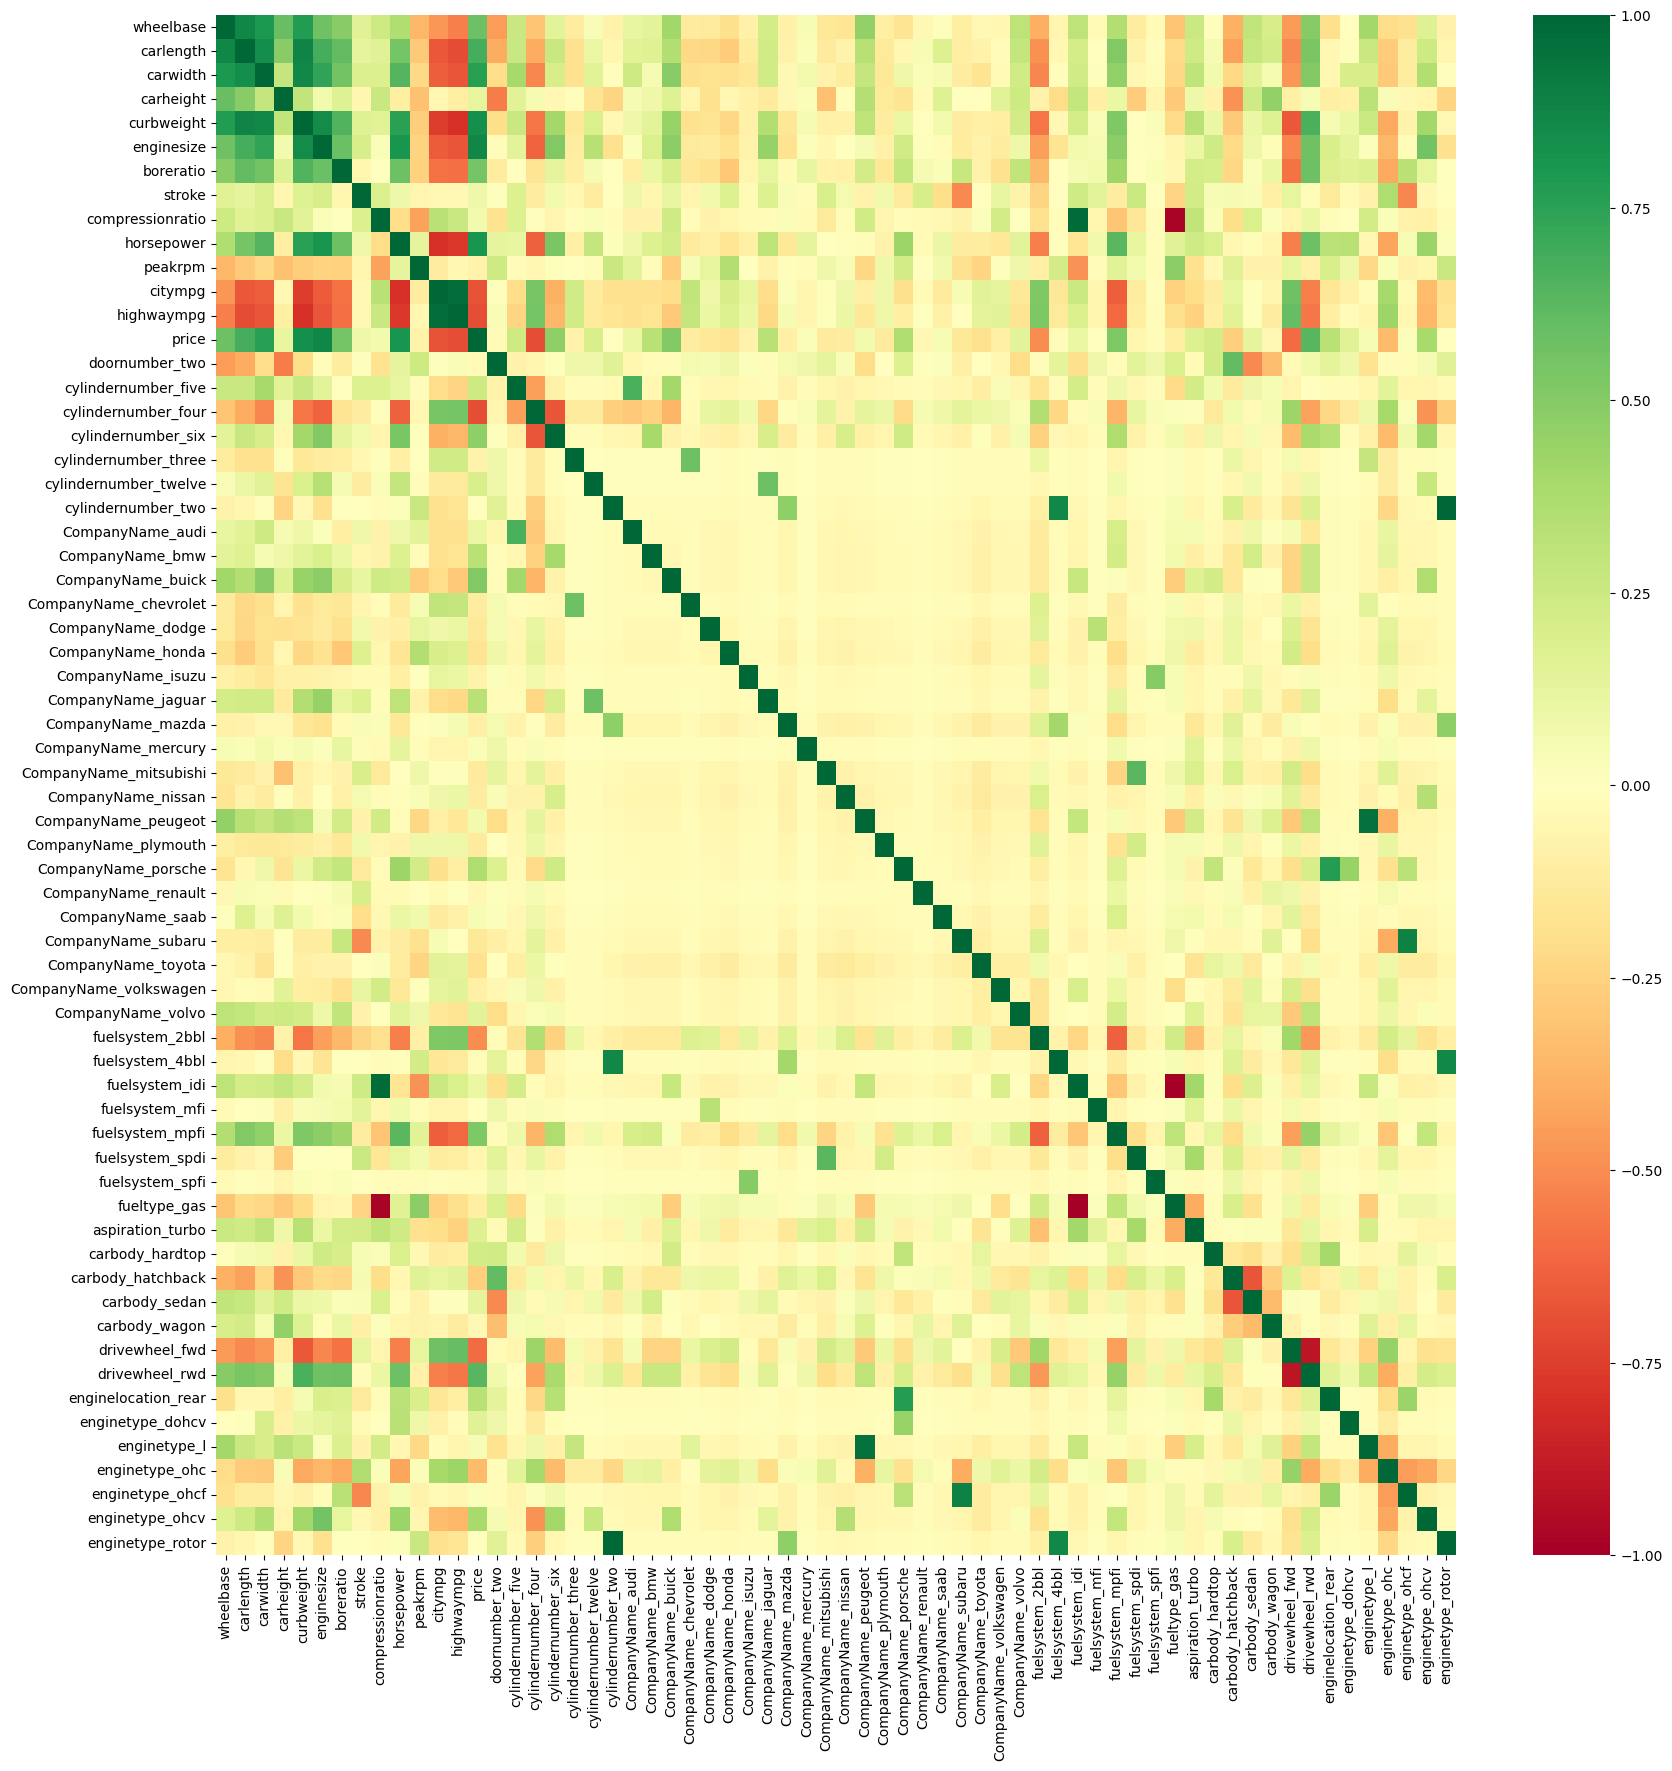

In [267]:
# Plot a heatmap to visualize the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(df2.corr(), cmap="RdYlGn")
plt.show()

In [268]:
# Select columns with numerical data types
num = df.select_dtypes(exclude=['object']).columns
num

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

<Axes: >

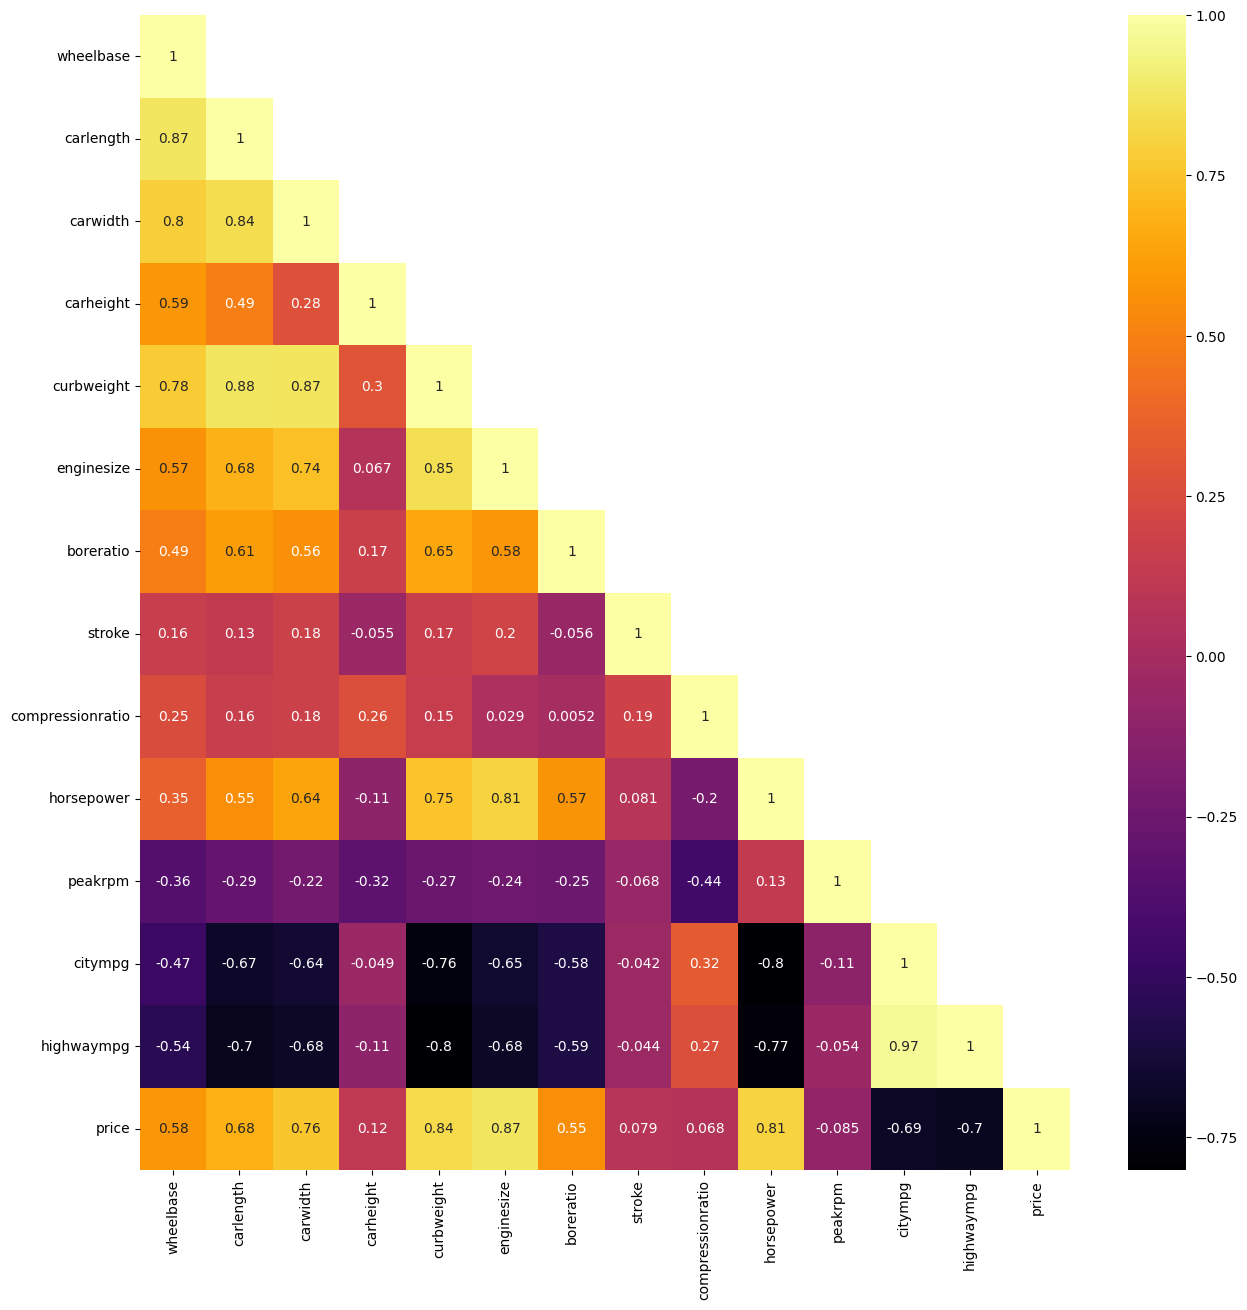

In [269]:
# Create a heatmap to visualize the correlation matrix of numerical columns
plt.figure(figsize=(15, 15))
sns.heatmap(df[num].corr(), annot=True, cmap='inferno', mask=np.triu(df[num].corr(), k=1))

# Plot Distribution

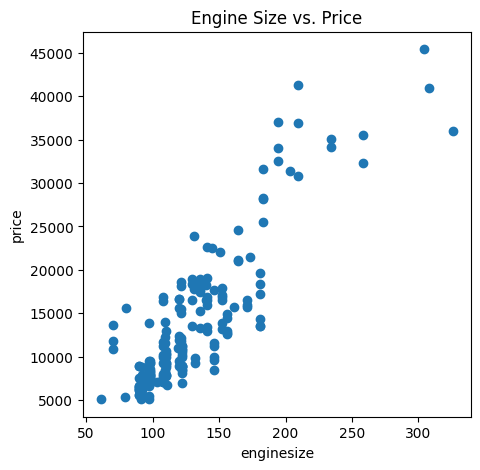

In [270]:
# Create a scatter plot of enginesize against price
plt.figure(figsize=(5, 5))
plt.scatter(x='enginesize', y='price', data=df2)
plt.xlabel('enginesize')
plt.title('Engine Size vs. Price')
plt.ylabel('price')
plt.show()

## Distribution of Numeric Variables

Text(0.5, 1.0, 'price Interval')

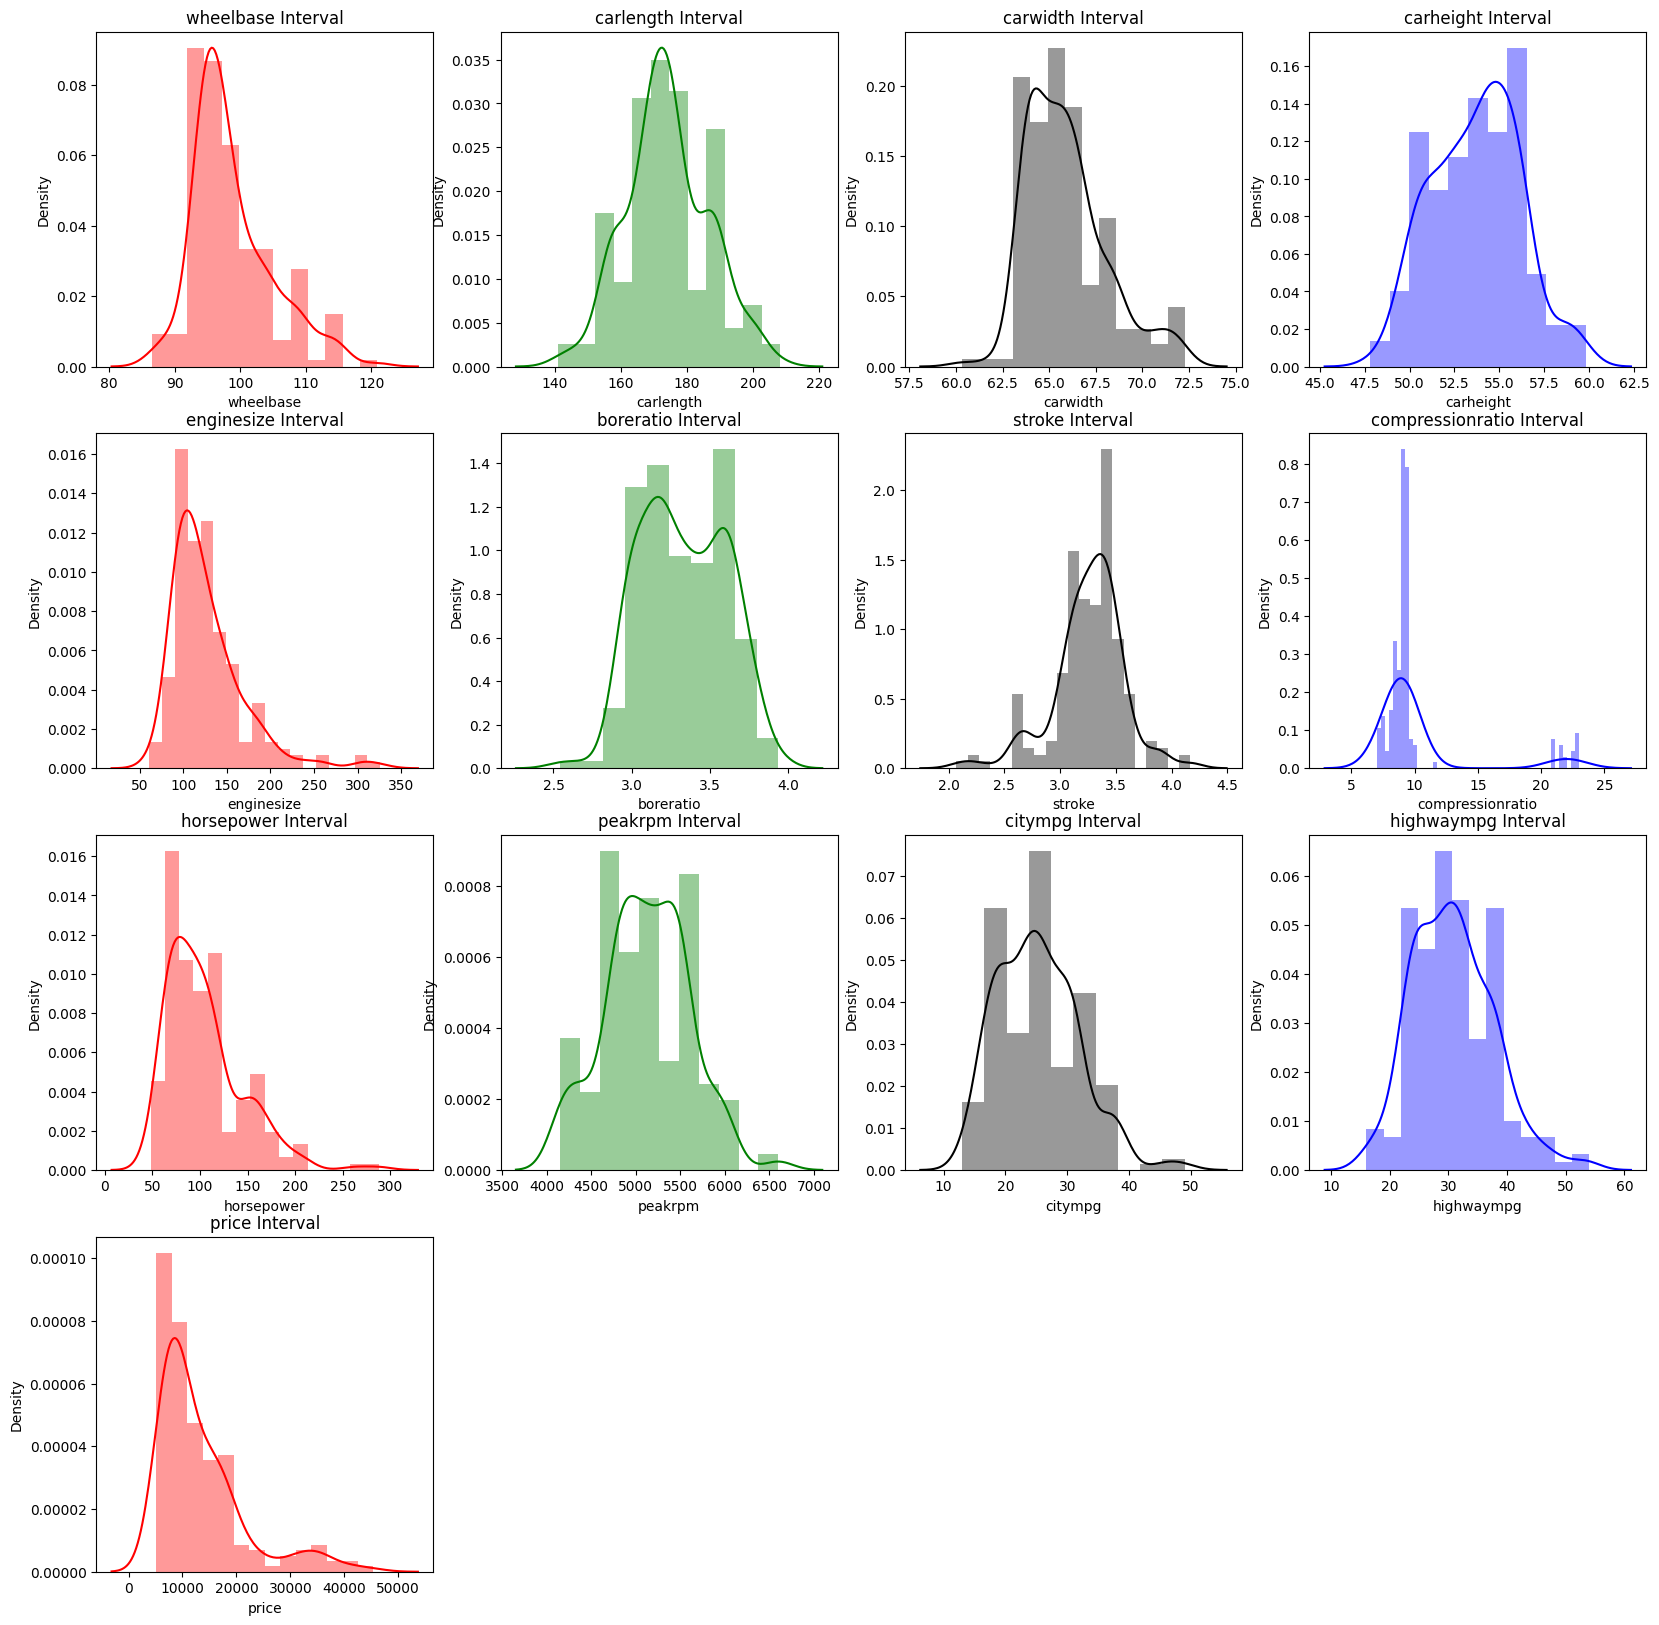

In [271]:
# Create a 4x4 grid of subplots for various numerical variables
plt.figure(figsize=(20, 20))

plt.subplot(4,4,1)
sns.distplot(df['wheelbase'], color="red").set_title('wheelbase Interval')

plt.subplot(4,4,2)
sns.distplot(df['carlength'], color="green").set_title('carlength Interval')

plt.subplot(4,4,3)
sns.distplot(df['carwidth'], color="black").set_title('carwidth Interval')

plt.subplot(4,4,4)
sns.distplot(df['carheight'], color="blue").set_title('carheight Interval')

plt.subplot(4,4,5)
sns.distplot(df['enginesize'], color="red").set_title('enginesize Interval')

plt.subplot(4,4,6)
sns.distplot(df['boreratio'], color="green").set_title('boreratio Interval')

plt.subplot(4,4,7)
sns.distplot(df['stroke'], color="black").set_title('stroke Interval')

plt.subplot(4,4,8)
sns.distplot(df['compressionratio'], color="blue").set_title('compressionratio Interval')

plt.subplot(4,4,9)
sns.distplot(df['horsepower'], color="red").set_title('horsepower Interval')

plt.subplot(4,4,10)
sns.distplot(df['peakrpm'], color="green").set_title('peakrpm Interval')

plt.subplot(4,4,11)
sns.distplot(df['citympg'], color="black").set_title('citympg Interval')

plt.subplot(4,4,12)
sns.distplot(df['highwaympg'], color="blue").set_title('highwaympg Interval')

plt.subplot(4,4,13)
sns.distplot(df['price'], color="red").set_title('price Interval')

# Split and Normalize Data

In [272]:
# Initialize LabelEncoder
l1 = LabelEncoder()

# Convert object-type columns to numerical using Label Encoding
for i in df2.columns:
    if df2[i].dtype == 'object':
        df2[i] = l1.fit_transform(df2[i])

df2

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,1,0,0,0,0,0,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,1,0,0,0,0,0,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,1,0,0,0,0,0,1,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,1,0,0,0,0,1,0,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,...,0,0,1,0,0,0,1,0,0,0
201,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,...,0,0,1,0,0,0,1,0,0,0
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,...,0,0,1,0,0,0,0,0,1,0
203,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,...,0,0,1,0,0,0,1,0,0,0


In [273]:
# Separate input (X) and output (Y) data
X = df2.drop(["price"], axis=1)  # Input data
Y = df2["price"]                  # Output data

In [274]:
# Perform train-test split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=7)

In [275]:
# Print the shapes of the datasets
print("X Train Scaler : ", x_train.shape) # Print shape of x_train
print("X Test Scaler : ",  x_test.shape)  # Print shape of x_test
print("Y Train Scaler : ", y_train.shape) # Print shape of y_train
print("Y Test Scaler : ",  y_test.shape)  # Print shape of y_test

X Train Scaler :  (174, 63)
X Test Scaler :  (31, 63)
Y Train Scaler :  (174,)
Y Test Scaler :  (31,)


In [276]:
# Find the maximum value in y_train data
max_1 = y_train.values
maximum = 0
minimum = min(y_train)

# Loop through the elements of y_train
for i in range(x_train.shape[0]):
    if max_1[i] > maximum:
        maximum = max_1[i]

minmax normalization
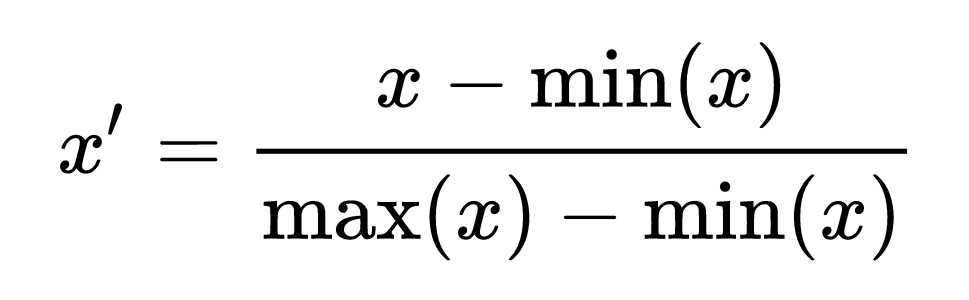

In [277]:
# Initialize Min-Max Scaler
scaler_1 = MinMaxScaler()

# Normalize the training input data
x_train = scaler_1.fit_transform(x_train)

# Normalize the test input data
x_test = scaler_1.transform(x_test)

In [278]:
# Convert y_train and y_test type to DataFrame
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

scaler_2 = MinMaxScaler()

# Normalize outputs
y_train = scaler_2.fit_transform(y_train)
y_test = scaler_2.transform(y_test)

# Multi-Layer Perceptron

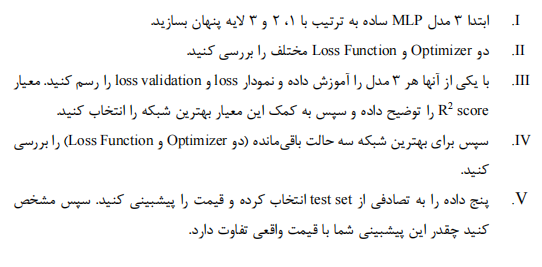

## MLP with 1 hidden layer

In [279]:
# Initialize the Sequential model
model_1 = Sequential()

# Add a hidden layer with 50 neurons and ReLU activation function
model_1.add(Dense(50, activation='relu', input_shape=(x_train.shape[1],)))

# Add an output layer with 1 neuron and linear activation function
model_1.add(Dense(1, activation='linear'))

model_1.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 50)                3200      
                                                                 
 dense_61 (Dense)            (None, 1)                 51        
                                                                 
Total params: 3251 (12.70 KB)
Trainable params: 3251 (12.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## MLP with 2 hidden layer

In [280]:
model_2 = Sequential()

# Add the first hidden layer with 50 neurons and linear activation function
model_2.add(Dense(50, activation='linear', input_shape=(x_train.shape[1],)))

# Add the second hidden layer with 30 neurons and linear activation function
model_2.add(Dense(30, activation='linear'))

# Add an output layer with 1 neuron and linear activation function
model_2.add(Dense(1, activation='linear'))

model_2.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_62 (Dense)            (None, 50)                3200      
                                                                 
 dense_63 (Dense)            (None, 30)                1530      
                                                                 
 dense_64 (Dense)            (None, 1)                 31        
                                                                 
Total params: 4761 (18.60 KB)
Trainable params: 4761 (18.60 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## MLP with 3 hidden layer

In [281]:
model_3 = Sequential()

# Add the first hidden layer with 50 neurons and ReLU activation function
model_3.add(Dense(50, activation='relu', input_shape=(x_train.shape[1],)))

# Add the second hidden layer with 30 neurons and ReLU activation function
model_3.add(Dense(30, activation='relu'))

# Add the third hidden layer with 10 neurons and ReLU activation function
model_3.add(Dense(10, activation='relu'))

# Add an output layer with 1 neuron and linear activation function
model_3.add(Dense(1, activation='linear'))

model_3.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_65 (Dense)            (None, 50)                3200      
                                                                 
 dense_66 (Dense)            (None, 30)                1530      
                                                                 
 dense_67 (Dense)            (None, 10)                310       
                                                                 
 dense_68 (Dense)            (None, 1)                 11        
                                                                 
Total params: 5051 (19.73 KB)
Trainable params: 5051 (19.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Fit model_1

In [282]:
model_1.compile(optimizer='adam', loss='mse')

history = model_1.fit(x_train, y_train, validation_split=0.2, epochs=100, batch_size=10)

Epoch 1/100
14/14 [==============================] - 1s 13ms/step - loss: 0.1418 - val_loss: 0.0747
Epoch 2/100
14/14 [==============================] - 0s 4ms/step - loss: 0.0576 - val_loss: 0.0579
Epoch 3/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0377 - val_loss: 0.0482
Epoch 4/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0261 - val_loss: 0.0391
Epoch 5/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0202 - val_loss: 0.0332
Epoch 6/100
14/14 [==============================] - 0s 4ms/step - loss: 0.0163 - val_loss: 0.0286
Epoch 7/100
14/14 [==============================] - 0s 4ms/step - loss: 0.0133 - val_loss: 0.0245
Epoch 8/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0110 - val_loss: 0.0211
Epoch 9/100
14/14 [==============================] - 0s 4ms/step - loss: 0.0093 - val_loss: 0.0191
Epoch 10/100
14/14 [==============================] - 0s 4ms/step - loss: 0.0080 - val_loss: 0.0166
Epoch 11

In [283]:
#Evaluate the model
loss = model_1.evaluate(x_test , y_test)

1/1 [==============================] - 0s 31ms/step - loss: 0.0168


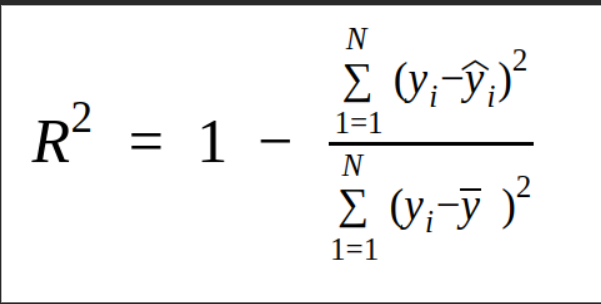

In [284]:
y_pred_1 = model_1.predict(x_test)
rscore_1 = r2_score(y_test, y_pred_1)

rscore_1

1/1 [==============================] - 0s 49ms/step


0.6251987418288564

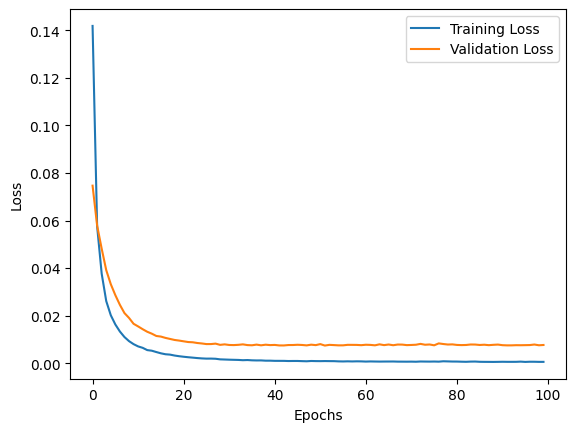

In [285]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='train')   # Training loss
plt.plot(history.history['val_loss'], label='val')  # Validation loss

plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

## Fit model_2

In [286]:
model_2.compile(optimizer='adam', loss='mse')
history = model_2.fit(x_train, y_train, validation_split=0.2, epochs=100 ,batch_size=10, verbose=0)

In [287]:
#Evaluate the model
loss = model_2.evaluate(x_test , y_test)

1/1 [==============================] - 0s 26ms/step - loss: 0.0078


In [288]:
y_pred_2 = model_2.predict(x_test)
rscore_2 = r2_score(y_test , y_pred_2)

rscore_2

1/1 [==============================] - 0s 53ms/step


0.8263285968876632

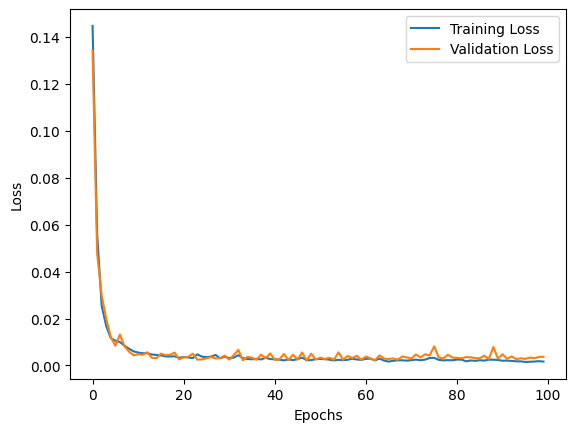

In [289]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='train')   # Training loss
plt.plot(history.history['val_loss'], label='val')  # Validation loss

plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

## Fit model_3

In [290]:
model_3.compile(optimizer='adam', loss='mse')

history = model_3.fit(x_train, y_train, validation_split=0.2, epochs=100, batch_size=10, verbose=0)

In [291]:
# Evaluate the model
loss = model_3.evaluate(x_test , y_test)

1/1 [==============================] - 0s 34ms/step - loss: 0.0084


In [292]:
y_pred_3 = model_3.predict(x_test)
rscore_3 = r2_score(y_test , y_pred_3)

rscore_3

1/1 [==============================] - 0s 63ms/step


0.8125831036049962

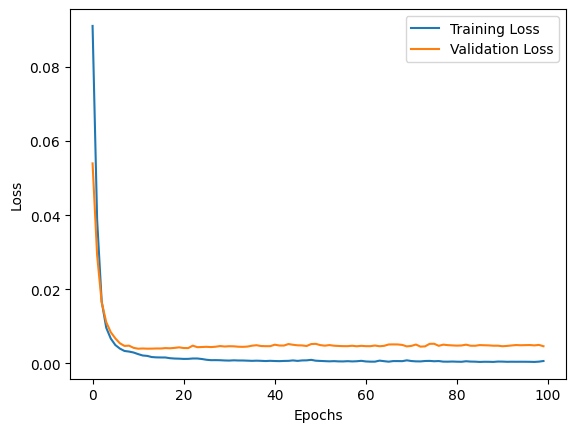

In [293]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='train')   # Training loss
plt.plot(history.history['val_loss'], label='val')  # Validation loss

plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

## Different losses and optimizers for model_2

### Adam + MAE

In [294]:
model_2 = Sequential()

# Add the first hidden layer with 50 neurons and linear activation function
model_2.add(Dense(50, activation='linear', input_shape=(x_train.shape[1],)))

# Add the second hidden layer with 30 neurons and linear activation function
model_2.add(Dense(30, activation='linear'))

# Add an output layer with 1 neuron and linear activation function
model_2.add(Dense(1, activation='linear'))

model_2.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_69 (Dense)            (None, 50)                3200      
                                                                 
 dense_70 (Dense)            (None, 30)                1530      
                                                                 
 dense_71 (Dense)            (None, 1)                 31        
                                                                 
Total params: 4761 (18.60 KB)
Trainable params: 4761 (18.60 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [295]:
# Compile the model with Adam optimizer and Mean Absolute Error (MAE) loss
model_2.compile(optimizer='adam', loss='mae')

history = model_2.fit(x_train, y_train, validation_split=0.2, epochs=100, batch_size=10, verbose=0)

loss = model_2.evaluate(x_test, y_test)

1/1 [==============================] - 0s 24ms/step - loss: 0.0599


In [296]:
y_pred_2 = model_2.predict(x_test)
rscore_2 = r2_score(y_test , y_pred_2)
rscore_2

1/1 [==============================] - 0s 53ms/step


0.8145732173176694

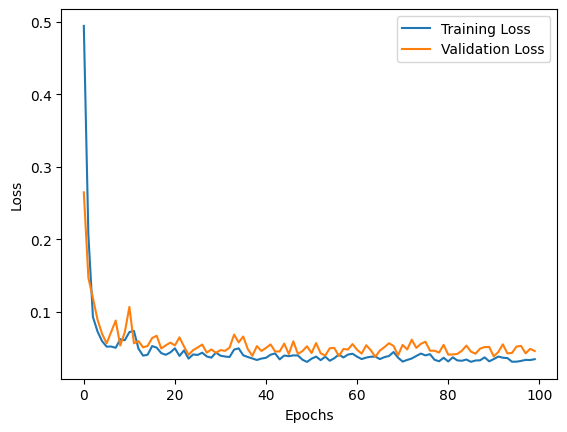

In [297]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')

plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

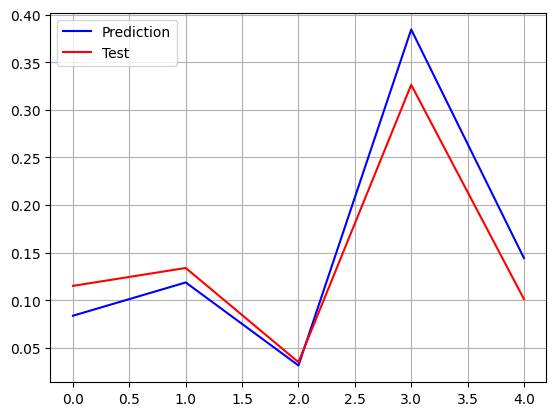

In [298]:
random_pred = list()
random_test = list()

for i in range(5):
  j = random.randint(0, len(y_pred_2))
  random_pred.append(y_pred_2[i])
  random_test.append(y_test[i])

# Plot the random predictions and actual test outputs
plt.plot(random_pred, 'b', label='Prediction')  # Blue line for predictions
plt.plot(random_test, 'r', label='Test')        # Red line for actual test outputs

plt.legend()
plt.grid()
plt.show()

### SGD + MSE

In [299]:
model_2 = Sequential()

# Add the first hidden layer with 50 neurons and linear activation function
model_2.add(Dense(50, activation='linear', input_shape=(x_train.shape[1],)))

# Add the second hidden layer with 30 neurons and linear activation function
model_2.add(Dense(30, activation='linear'))

# Add an output layer with 1 neuron and linear activation function
model_2.add(Dense(1, activation='linear'))

model_2.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 50)                3200      
                                                                 
 dense_73 (Dense)            (None, 30)                1530      
                                                                 
 dense_74 (Dense)            (None, 1)                 31        
                                                                 
Total params: 4761 (18.60 KB)
Trainable params: 4761 (18.60 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [300]:
# Compile model with stochastic gradient descent optimizer and mean square error loss
model_2.compile(optimizer = 'sgd',loss = 'mse')

history = model_2.fit(x_train ,y_train ,validation_split=0.2 ,epochs = 100,batch_size = 10,verbose = 0)
loss = model_2.evaluate(x_test , y_test)

1/1 [==============================] - 0s 36ms/step - loss: 0.0129


In [301]:
y_pred_2 = model_2.predict(x_test)
rscore_2 = r2_score(y_test , y_pred_2)
rscore_2

1/1 [==============================] - 0s 74ms/step


0.7117211430592916

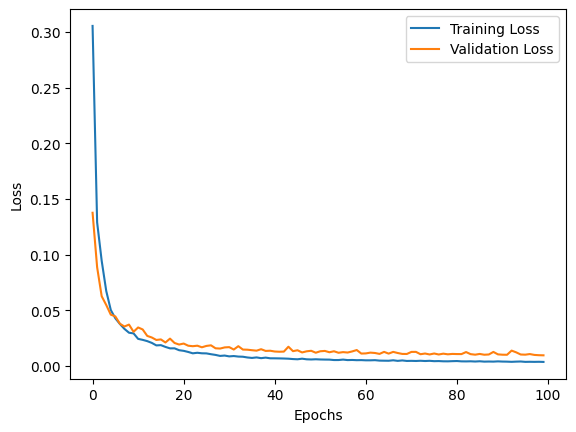

In [302]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')

plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

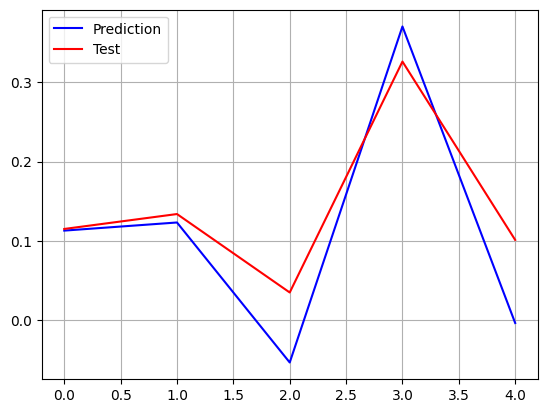

In [303]:
random_pred = list()
random_test = list()

for i in range(5):
  j = random.randint(0, len(y_pred_2))
  random_pred.append(y_pred_2[i])
  random_test.append(y_test[i])

# Plot the random predictions and actual test outputs
plt.plot(random_pred, 'b', label='Prediction')  # Blue line for predictions
plt.plot(random_test, 'r', label='Test')        # Red line for actual test outputs

plt.legend()
plt.grid()
plt.show()

### SGD + MAE

In [304]:
model_2 = Sequential()

# Add the first hidden layer with 50 neurons and linear activation function
model_2.add(Dense(50, activation='linear', input_shape=(x_train.shape[1],)))

# Add the second hidden layer with 30 neurons and linear activation function
model_2.add(Dense(30, activation='linear'))

# Add an output layer with 1 neuron and linear activation function
model_2.add(Dense(1, activation='linear'))

model_2.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_75 (Dense)            (None, 50)                3200      
                                                                 
 dense_76 (Dense)            (None, 30)                1530      
                                                                 
 dense_77 (Dense)            (None, 1)                 31        
                                                                 
Total params: 4761 (18.60 KB)
Trainable params: 4761 (18.60 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [305]:
# Compile model with stochastic gradient descent optimizer and mean absolute error loss
model_2.compile(optimizer = 'sgd',loss = 'mae')

history = model_2.fit(x_train ,y_train ,validation_split=0.2 ,epochs = 100,batch_size = 10,verbose = 0)
loss = model_2.evaluate(x_test , y_test)

1/1 [==============================] - 0s 47ms/step - loss: 0.0634


In [306]:
y_pred_2 = model_2.predict(x_test)
rscore_2 = r2_score(y_test , y_pred_2)
rscore_2

1/1 [==============================] - 0s 88ms/step


0.8063821018685213

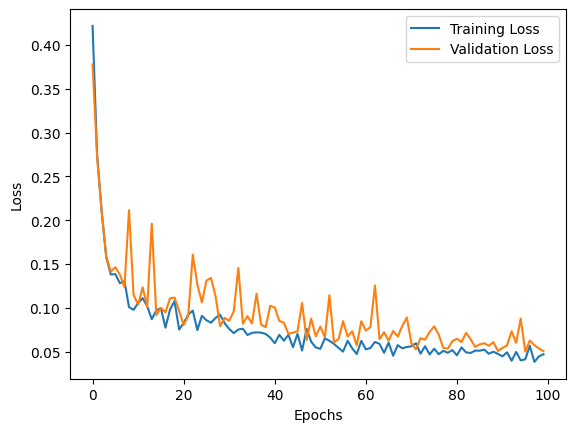

In [307]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')

plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

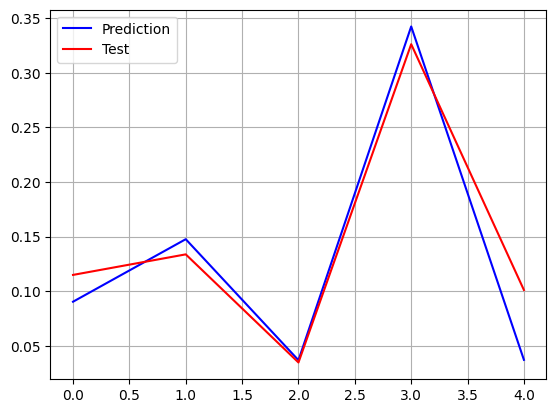

In [308]:
random_pred = list()
random_test = list()

for i in range(5):
  j = random.randint(0, len(y_pred_2))
  random_pred.append(y_pred_2[i])
  random_test.append(y_test[i])

# Plot the random predictions and actual test outputs
plt.plot(random_pred, 'b', label='Prediction')  # Blue line for predictions
plt.plot(random_test, 'r', label='Test')        # Red line for actual test outputs

plt.legend()
plt.grid()
plt.show()

## Prediction

In [309]:
# Calculate the range of the output values
a = maximum - minimum

# Convert predicted values back to the original scale
y_pred_true = a * (y_pred_2)
y_pred_true_1 = y_pred_true + minimum

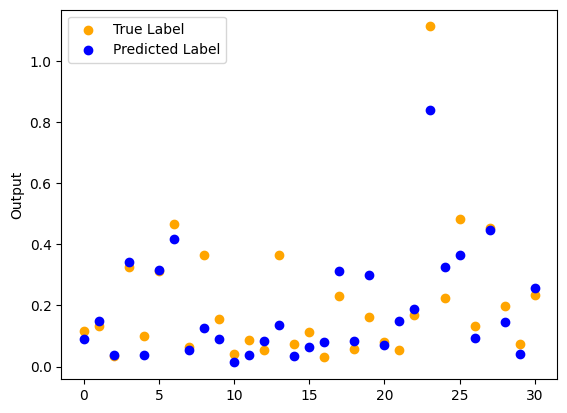

In [310]:
# Create a scatter plot for true and predicted outputs
plt.scatter(range(len(y_test)), y_test, color="orange")  # True labels in orange
plt.scatter(range(len(y_test)), y_pred_2, color="blue")  # Predicted labels in blue

plt.legend(['True Label', 'Predicted Label'])
plt.ylabel("Output")
plt.show()